In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_train.shape

(60000, 28, 28)

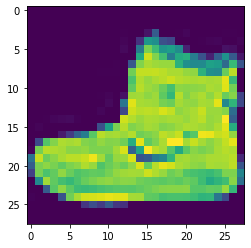

In [5]:
plt.imshow(x_train[0])

In [6]:
x_train.max()

255

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [12]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28,28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(x_train, y_cat_train, validation_data = (x_test, y_cat_test), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 223us/sample - loss: 0.4024 - accuracy: 0.8565 - val_loss: 0.3146 - val_accuracy: 0.8874
Epoch 2/5
60000/60000 [==============================] - 13s 214us/sample - loss: 0.2752 - accuracy: 0.8988 - val_loss: 0.2947 - val_accuracy: 0.8928
Epoch 3/5
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2309 - accuracy: 0.9143 - val_loss: 0.2865 - val_accuracy: 0.9004
Epoch 4/5
60000/60000 [==============================] - 13s 215us/sample - loss: 0.1985 - accuracy: 0.9261 - val_loss: 0.2685 - val_accuracy: 0.9046
Epoch 5/5
60000/60000 [==============================] - 13s 216us/sample - loss: 0.1715 - accuracy: 0.9367 - val_loss: 0.2594 - val_accuracy: 0.9092


In [15]:
model.metrics_names

['loss', 'accuracy']

In [18]:
metrics = pd.DataFrame(model.history.history)

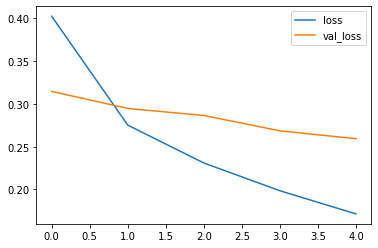

In [19]:
metrics[['loss', 'val_loss']].plot()

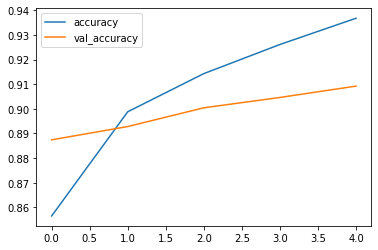

In [20]:
metrics[['accuracy', 'val_accuracy']].plot()

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
predictions = model.predict_classes(x_test)

In [23]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.80      0.90      0.85      1000
           3       0.90      0.93      0.91      1000
           4       0.86      0.83      0.84      1000
           5       0.98      0.98      0.98      1000
           6       0.78      0.72      0.75      1000
           7       0.96      0.96      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



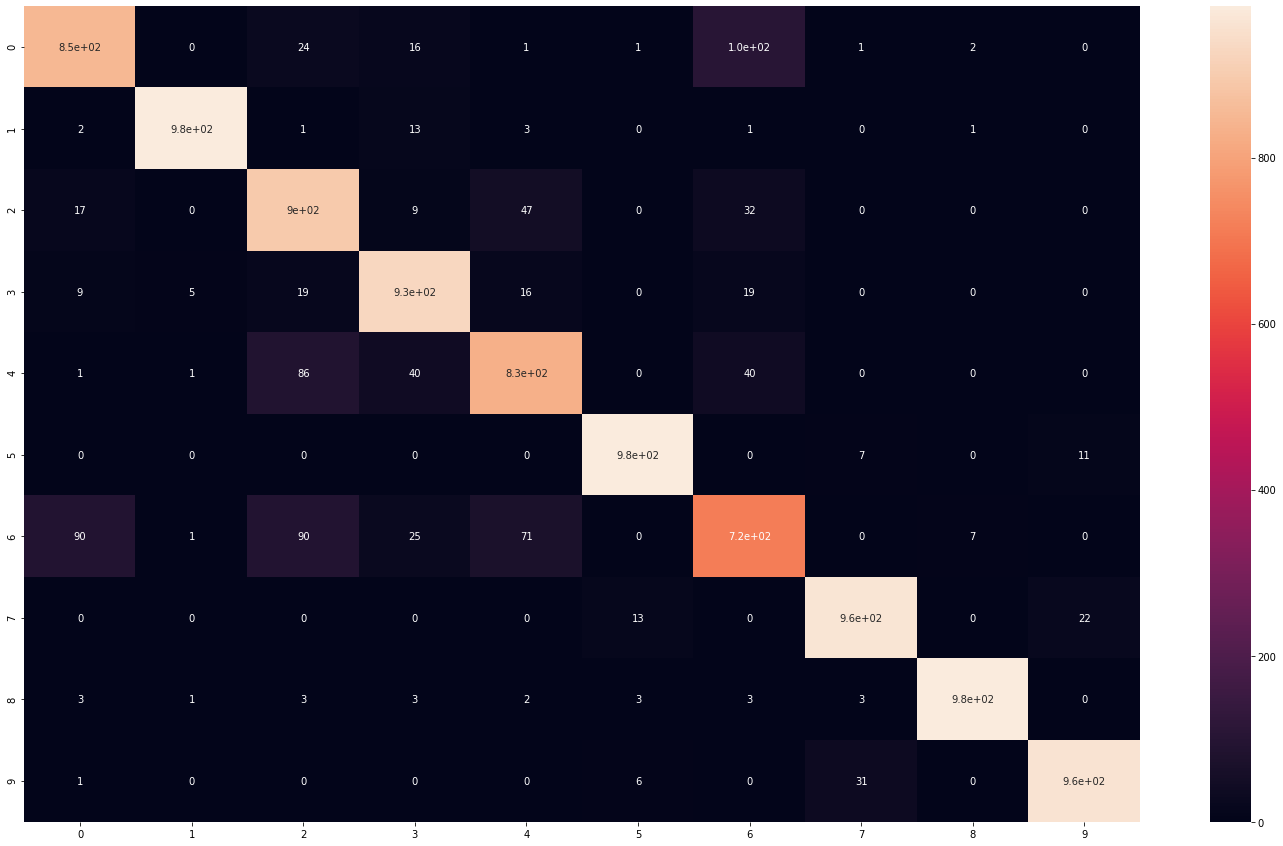

In [25]:
plt.figure(figsize=(25,15))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)